In [1]:
!nvidia-smi

Mon Apr 11 16:59:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE

# Ensemble Learning
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

In [1]:
import pandas as pd
from sklearn import datasets
load_df = datasets.fetch_california_housing()

data = pd.DataFrame(load_df.data)
feature = pd.DataFrame(load_df.feature_names)
data.columns = feature[0]
target = pd.DataFrame(load_df.target)
target.columns=['target']
df = pd.concat([data, target], axis=1)
print(df.shape)
df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 데이터 분석 과정
1. Business problem definition
2. Data collection
3. Data preprocessing
4. Data exploration
5. Modeling
6. Evaluation
7. (If model is valid) Decision making from the models

### 데이터 분석
- 데이터 전처리
- 데이터 탐색
- 분류
- 군집
- 연관규칙
- 차원축소

In [2]:
!pip install -U pandas-profiling
import pandas_profiling
pr = df.profile_report()
pr

Output hidden; open in https://colab.research.google.com to view.

     |████████████████████████████████| 9.5 MB 7.1 MB/s 
     |████████████████████████████████| 943 kB 29.8 MB/s 
     |████████████████████████████████| 965 kB 52.2 MB/s 
     |████████████████████████████████| 78 kB 8.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.5 MB 51.4 MB/s 
     |████████████████████████████████| 366 kB 69.5 MB/s 
     |████████████████████████████████| 749 kB 50.2 MB/s 
     |████████████████████████████████| 50 kB 9.3 MB/s 
     |████████████████████████████████| 1.0 MB 58.1 MB/s 
     |████████████████████████████████| 1.1 MB 48.6 MB/s 
     |████████████████████████████████| 28.5 MB 64.3 MB/s 
     |████████████████████████████████| 95 kB 3.7 MB/s 
     |████████████████████████████████| 132 kB 56.5 MB/s 
     |████████████████████████████████| 144 kB 44.9 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
     |██████


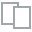
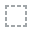
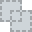
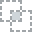
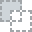
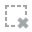
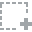
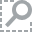
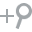
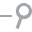
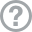
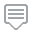
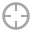
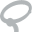
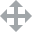
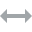
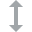
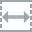
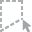
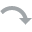
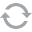
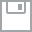
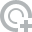
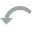
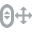
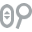
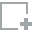
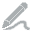
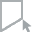
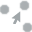
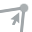
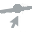

In [3]:
!pip install dataprep
from dataprep.eda import *
plot(df)

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
df.describe(include = 'all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 데이터 시각화

In [11]:
def pie_plot(feature):
    plt.figure(figsize=(12, 8))
    df[feature].value_counts().plot.pie(autopct='%1.1f%%')

In [12]:
def count_plot(feature):
    plt.figure(figsize=(12, 8))
    g1 = sns.countplot(data = df, x = feature)
    g1.set_title(f"{feature} Distribution")
    plt.show()

In [13]:
def bar_plot(feature):
    plt.figure(figsize=(12, 8))
    g2 = sns.barplot(x=df[feature],y=df['target'])
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# MedInc	HouseAge	AveRooms	AveBedrms	Population	AveOccup	Latitude	Longitude	target

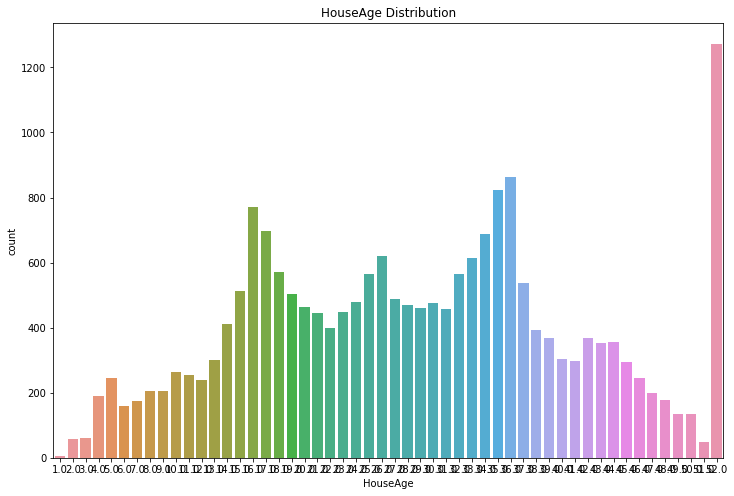

In [19]:
count_plot('HouseAge')

### 수치형 변수간 상관관계 파악

In [21]:
num_cols_data_cor = df.corr()
num_cols_data_cor

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


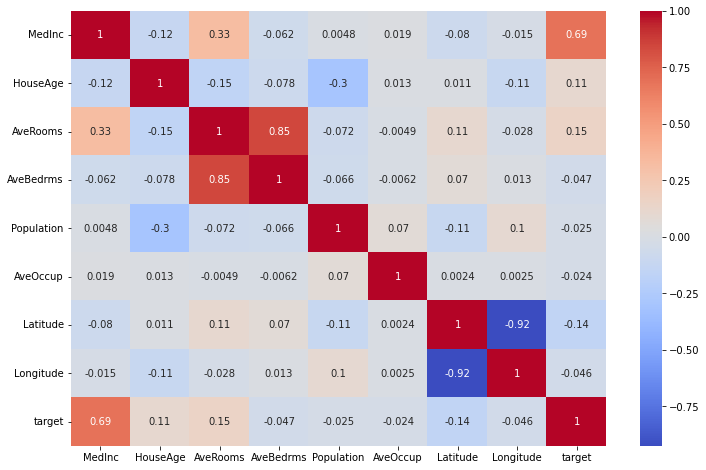

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(num_cols_data_cor,cmap='coolwarm', annot=True)

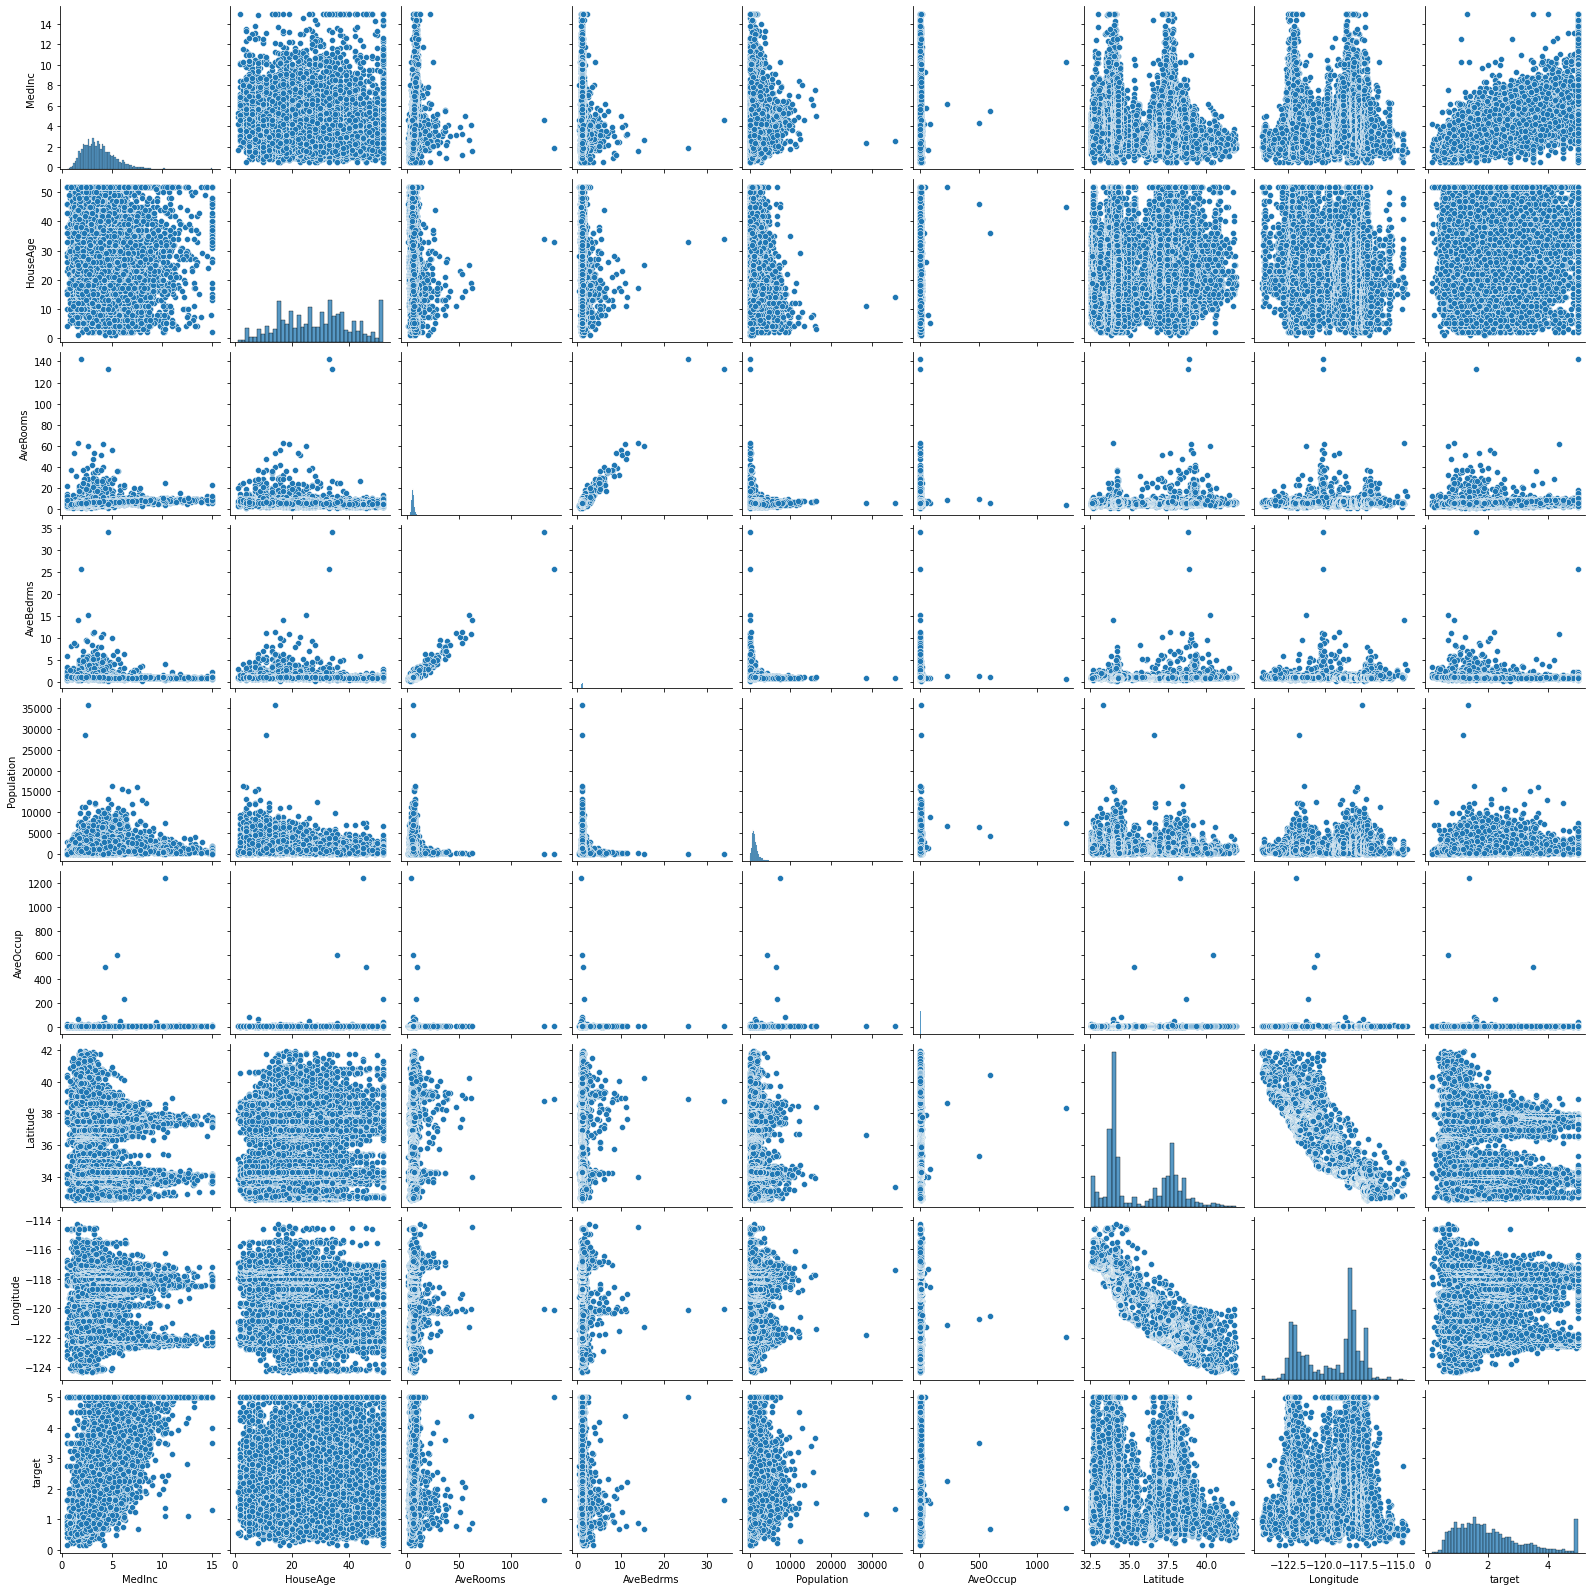

In [23]:
sns.pairplot(df)

## 데이터 분석 기법 리스트
- K-Nearest Neighbor
- CART (Decision Tree)
- Clustering (K-Means 군집화, 계층적 Hierarchical 군집화, DBSCAN)

### 일반 회귀 모형 (1) - Support Vector Machine

In [24]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_n = X.to_numpy()

In [25]:
print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [26]:
print(y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64


In [27]:
# random_state는 모두 17로 고정

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [28]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20118,3.6250,22.0,5.161616,0.979798,517.0,2.611111,37.92,-120.40
13243,8.4839,9.0,7.912245,1.000000,1815.0,3.704082,34.14,-117.65
4468,2.3750,33.0,4.378613,1.199422,1345.0,3.887283,34.09,-118.16
1055,3.0905,12.0,5.122490,1.056225,3628.0,2.428380,39.78,-121.86
10250,3.7361,19.0,5.034161,1.018634,871.0,2.704969,33.88,-117.86
...,...,...,...,...,...,...,...,...
9529,2.7171,22.0,6.041899,1.217877,1048.0,2.927374,38.94,-123.15
406,6.9414,52.0,8.067194,1.067194,671.0,2.652174,37.90,-122.27
13702,2.5875,22.0,4.762295,0.905738,995.0,4.077869,34.11,-117.23
2191,3.0870,19.0,5.956916,1.138322,1295.0,2.936508,36.74,-120.07


In [29]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18403,5.4741,24.0,6.587799,1.060181,4017.0,3.311624,37.24,-121.84
13405,1.9583,7.0,5.362805,1.442073,1064.0,3.243902,34.10,-117.46
9539,2.6058,40.0,3.885714,0.914286,785.0,4.485714,37.39,-120.71
8668,4.5817,30.0,4.146135,1.108696,1526.0,1.842995,33.82,-118.39
9019,8.0137,9.0,7.734673,1.041211,12873.0,3.274739,34.16,-118.78
...,...,...,...,...,...,...,...,...
8043,3.8646,36.0,4.975395,1.007030,1462.0,2.569420,33.84,-118.16
920,5.2396,26.0,5.737057,1.009537,2352.0,3.204360,37.52,-121.96
1697,6.2073,5.0,7.184633,1.041284,3326.0,3.814220,38.00,-122.26
7363,2.7540,28.0,3.564841,1.011527,2830.0,4.077810,33.97,-118.20


In [30]:
y_train

20118    0.994
13243    4.067
4468     1.750
1055     1.178
10250    2.014
         ...  
9529     0.958
406      4.175
13702    0.813
2191     0.882
10863    1.849
Name: target, Length: 14448, dtype: float64

In [31]:
y_test

18403    2.38800
13405    1.08800
9539     0.72700
8668     5.00001
9019     3.99200
          ...   
8043     2.14600
920      2.23900
1697     2.72900
7363     1.66200
9280     2.79200
Name: target, Length: 6192, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

lin_reg = LinearRegression()
svl = SVR(kernel='linear')
svr = SVR(kernel='rbf')

lin_reg.fit(X_train, y_train)
svl.fit(X_train, y_train)
svr.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
y_pred_svl = svl.predict(X_test)
y_pred_svr = svr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_svl = mean_squared_error(y_test, y_pred_svl)
mse_svr = mean_squared_error(y_test, y_pred_svr)

rmse_lin = np.sqrt(mse_lin)
rmse_svl = np.sqrt(mse_svl)
rmse_svr = np.sqrt(mse_svr)

print("RMSE for Linear Model : %.2f" % (rmse_lin))
print("RMSE for SVM with Linear Model : %.2f" % (rmse_svl))
print("RMSE for SVM with Rbf Model : %.2f" % (rmse_svr))